<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Natural Language Processing (NLP)
## *Data Science Unit 4 Sprint 1 Assignment 1*

Your goal in this assignment: find the attributes of the best & worst coffee shops in the dataset. The text is fairly raw: dates in the review, extra words in the `star_rating` column, etc. You'll probably want to clean that stuff up for a better analysis. 

Analyze the corpus of text using text visualizations of token frequency. Try cleaning the data as much as possible. Try the following techniques: 
- Lemmatization
- Custom stopword removal

Keep in mind the attributes of good tokens. Once you have a solid baseline, layer in the star rating in your visualization(s). Key part of this assignment - produce a write-up of the attributes of the best and worst coffee shops. Based on your analysis, what makes the best the best and the worst the worst. Use graphs and numbesr from your analysis to support your conclusions. There should be plenty of markdown cells! :coffee:

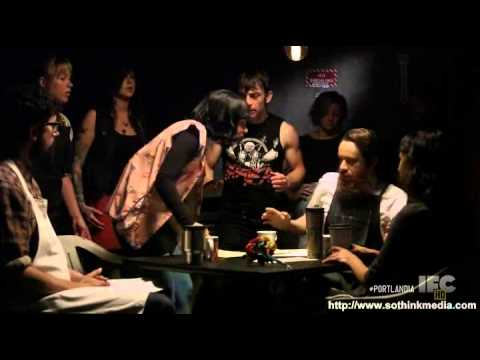

In [1]:
from IPython.display import YouTubeVideo

YouTubeVideo('Jml7NVYm8cs')

In [2]:
%pwd

'/home/jupyter/DS-Unit-4-Sprint-1-NLP/module1-text-data'

In [3]:
import pandas as pd

url = "https://raw.githubusercontent.com/LambdaSchool/DS-Unit-4-Sprint-1-NLP/main/module1-text-data/data/yelp_coffeeshop_review_data.csv"

shops = pd.read_csv(url)
shops.head()

coffee_shop_name  \
0  The Factory - Cafe With a Soul    
1  The Factory - Cafe With a Soul    
2  The Factory - Cafe With a Soul    
3  The Factory - Cafe With a Soul    
4  The Factory - Cafe With a Soul    

                                    full_review_text        star_rating  
0   11/25/2016 1 check-in Love love loved the atm...   5.0 star rating   
1   12/2/2016 Listed in Date Night: Austin, Ambia...   4.0 star rating   
2   11/30/2016 1 check-in Listed in Brunch Spots ...   4.0 star rating   
3   11/25/2016 Very cool decor! Good drinks Nice ...   2.0 star rating   
4   12/3/2016 1 check-in They are located within ...   4.0 star rating

In [4]:
with pd.option_context('display.max_rows', 999):
    print (shops.coffee_shop_name.value_counts())

Epoch Coffee                            400
Halcyon                                 300
The Factory - Cafe With a Soul          244
Houndstooth Coffee                      200
Venezia Italian Gelato                  200
Caffé Medici                            143
Apanas Coffee & Beer                    136
Café Java                               100
Pacha                                   100
Seventh Flag Coffee Co                  100
Russell’s Bakery                        100
Genuine Joe                             100
La Tazza Fresca                         100
Tea Haus                                100
Teo                                     100
Dolce Neve                              100
Sa-Ten                                  100
Lola Savannah Coffee Lounge             100
Mary’s Cafe                             100
Bennu Coffee                            100
Patika                                  100
Hot Mama’s Cafe                         100
Kick Butt Coffee Music & Booze  

In [5]:
shops.shape

(7616, 3)

In [6]:
print(shops)

                     coffee_shop_name  \
0     The Factory - Cafe With a Soul    
1     The Factory - Cafe With a Soul    
2     The Factory - Cafe With a Soul    
3     The Factory - Cafe With a Soul    
4     The Factory - Cafe With a Soul    
...                               ...   
7611               The Steeping Room    
7612               The Steeping Room    
7613               The Steeping Room    
7614               The Steeping Room    
7615               The Steeping Room    

                                       full_review_text        star_rating  
0      11/25/2016 1 check-in Love love loved the atm...   5.0 star rating   
1      12/2/2016 Listed in Date Night: Austin, Ambia...   4.0 star rating   
2      11/30/2016 1 check-in Listed in Brunch Spots ...   4.0 star rating   
3      11/25/2016 Very cool decor! Good drinks Nice ...   2.0 star rating   
4      12/3/2016 1 check-in They are located within ...   4.0 star rating   
...                                          

In [7]:
shops['coffee_shop_name'].unique()

array(['The Factory - Cafe With a Soul ',
       'The Marvelous Vintage Tea Party Co. ', 'Vintage Heart Coffee ',
       'Fleet Coffee ', 'Mozart’s Coffee Roasters ',
       'Summermoon Coffee Bar ', 'Monkey Nest Coffee ',
       'Apanas Coffee & Beer ', 'Corona Coffee ', 'Café Crème ',
       'Brian’s Brew ', 'Legend Coffee ', 'Venezia Italian Gelato ',
       'Epoch Coffee ', 'Houndstooth Coffee ', 'Caffé Medici ',
       'Flitch Coffee ', 'Caffe Medici ', 'Holy Grounds ',
       'Figure 8 Coffee Purveyors ', 'Mañana Coffee & Juice ',
       'Summer Moon Coffee Bar ', 'Fat Cats Organic Coffee And Dessert ',
       'Flat Track Coffee ', 'Mary’s Cafe ', 'Anderson’s Coffee Company ',
       'Flightpath Coffeehouse ', 'Third Coast Coffee Roasting Company ',
       'Bennu Coffee ', 'Dolce Neve ', 'Thunderbird Coffee ', 'Halcyon ',
       'Cherrywood Coffeehouse ', 'Jo’s Coffee ',
       'Arturo’s Underground Cafe ', 'Patika ', 'Cenote ',
       'The Hideout Coffeehouse ', 'Lucky Lab Coffe

In [9]:
shops['full_review_text'].iloc[1000]

" 9/18/2016 Just tried the hazelnut and cheesecake gelato. Husband had the Ferrero and coffee. So delicious and authentic. Our favorite was the hazelnut. Some of the best gelato I've had. "

In [10]:
shops['full_review_text'].value_counts().sum()

7616

## How do we want to analyze these coffee shop tokens? 

- Overall Word / Token Count
- View Counts by Rating 
- *Hint:* a 'bad' coffee shops has a rating betweeen 1 & 3 based on the distribution of ratings. A 'good' coffee shop is a 4 or 5. 

In [11]:
import re

def tokenize(text):
    
    regex_remove_non_alphanumeric = '[^a-zA-Z ]'
    replace_with = ""
    
    clean_text = re.sub(regex_remove_non_alphanumeric, replace_with, text)
    
    # So I had to use strip to remove whitespace from both the BEGINNING & END of a string. 
    # Had to do it here, before the split(" ") as this can't be performed on a list.
    stripped_text = clean_text.strip("  ")
    
    clean_text = stripped_text.lower()
    
    split_text = clean_text.split(" ")
    
    
    # List comphrehension for removing blank strings left over from stripping. 
    #There were some numerical values leftover because some rating reviews had actual ratings within the ratings 
    tokens = [x for x in split_text if x]
    
    return tokens

In [12]:
shops['tokens'] = shops['full_review_text'].apply(tokenize)

In [13]:
shops['tokens']

0       [checkin, love, love, loved, the, atmosphere, ...
1       [listed, in, date, night, austin, ambiance, in...
2       [checkin, listed, in, brunch, spots, i, loved,...
3       [very, cool, decor, good, drinks, nice, seatin...
4       [checkin, they, are, located, within, the, nor...
                              ...                        
7611    [i, actually, step, into, this, restaurant, by...
7612    [ok, the, steeping, room, is, awesome, how, do...
7613    [loved, coming, here, for, tea, and, the, atmo...
7614    [the, food, is, just, average, the, booths, di...
7615    [i, finally, stopped, in, for, lunch, with, my...
Name: tokens, Length: 7616, dtype: object

In [14]:
shops.head()

coffee_shop_name  \
0  The Factory - Cafe With a Soul    
1  The Factory - Cafe With a Soul    
2  The Factory - Cafe With a Soul    
3  The Factory - Cafe With a Soul    
4  The Factory - Cafe With a Soul    

                                    full_review_text        star_rating  \
0   11/25/2016 1 check-in Love love loved the atm...   5.0 star rating    
1   12/2/2016 Listed in Date Night: Austin, Ambia...   4.0 star rating    
2   11/30/2016 1 check-in Listed in Brunch Spots ...   4.0 star rating    
3   11/25/2016 Very cool decor! Good drinks Nice ...   2.0 star rating    
4   12/3/2016 1 check-in They are located within ...   4.0 star rating    

                                              tokens  
0  [checkin, love, love, loved, the, atmosphere, ...  
1  [listed, in, date, night, austin, ambiance, in...  
2  [checkin, listed, in, brunch, spots, i, loved,...  
3  [very, cool, decor, good, drinks, nice, seatin...  
4  [checkin, they, are, located, within, the, nor...

In [15]:
def rating(rate):
    regex_remove_text = '[a-zA-Z ]'
    replace_this = ""
    clean_rate = re.sub(regex_remove_text, replace_this, rate)
    return clean_rate

In [16]:
shops['star_rating'] = shops['star_rating'].apply(rating).astype(float)

In [17]:
shops['star_rating']

0       5.0
1       4.0
2       4.0
3       2.0
4       4.0
       ... 
7611    4.0
7612    5.0
7613    4.0
7614    3.0
7615    4.0
Name: star_rating, Length: 7616, dtype: float64

In [18]:
shops.head()

coffee_shop_name  \
0  The Factory - Cafe With a Soul    
1  The Factory - Cafe With a Soul    
2  The Factory - Cafe With a Soul    
3  The Factory - Cafe With a Soul    
4  The Factory - Cafe With a Soul    

                                    full_review_text  star_rating  \
0   11/25/2016 1 check-in Love love loved the atm...          5.0   
1   12/2/2016 Listed in Date Night: Austin, Ambia...          4.0   
2   11/30/2016 1 check-in Listed in Brunch Spots ...          4.0   
3   11/25/2016 Very cool decor! Good drinks Nice ...          2.0   
4   12/3/2016 1 check-in They are located within ...          4.0   

                                              tokens  
0  [checkin, love, love, loved, the, atmosphere, ...  
1  [listed, in, date, night, austin, ambiance, in...  
2  [checkin, listed, in, brunch, spots, i, loved,...  
3  [very, cool, decor, good, drinks, nice, seatin...  
4  [checkin, they, are, located, within, the, nor...

In [19]:
from collections import Counter

import squarify
import matplotlib.pyplot as plt
import seaborn as sns

import spacy
from spacy.tokenizer import Tokenizer
from nltk.stem import PorterStemmer

nlp = spacy.load('en_core_web_lg')

In [20]:
word_counter = Counter()

shops["tokens"].apply(lambda token: word_counter.update(token));

word_counter.most_common(20)

[('the', 34809),
 ('and', 26651),
 ('a', 22756),
 ('i', 20249),
 ('to', 17164),
 ('of', 12600),
 ('is', 11999),
 ('coffee', 10354),
 ('was', 9707),
 ('in', 9546),
 ('it', 9380),
 ('for', 8680),
 ('this', 6583),
 ('but', 6501),
 ('with', 6332),
 ('my', 6202),
 ('they', 6165),
 ('that', 6151),
 ('you', 5847),
 ('place', 5426)]

In [21]:
def count(tokens):
    
    word_counts = Counter()
    
    appears_in = Counter()

    total_docs = len(tokens)

    for token in tokens: 
        word_counts.update(token)
        appears_in.update(set(token))

    temp = zip(word_counts.keys(), word_counts.values())
    wc = pd.DataFrame(temp, columns = ['word', 'count'])

    wc['rank'] = wc['count'].rank(method='first', ascending=False)
    total = wc['count'].sum()

    wc['pct_total'] = wc['count'].apply(lambda token_count: token_count / total * 100)
 
    wc = wc.sort_values(by='rank')
    wc['cul_pct_total'] = wc['pct_total'].cumsum()

    t2 = zip(appears_in.keys(), appears_in.values())
    ac = pd.DataFrame(t2, columns=['word', 'appears_in'])
    
    wc = ac.merge(wc, on='word')

    wc['appears_in_pct'] = wc['appears_in'].apply(lambda x: x / total_docs * 100)

    return wc.sort_values(by='rank')

In [22]:
wc = count(shops['tokens'])
wc.head()

word  appears_in  count  rank  pct_total  cul_pct_total  appears_in_pct
35  the        6847  34809   1.0   4.541155       4.541155       89.902836
39  and        6864  26651   2.0   3.476869       8.018024       90.126050
34    a        6246  22756   3.0   2.968730      10.986754       82.011555
17    i        5532  20249   4.0   2.641669      13.628423       72.636555
28   to        5653  17164   5.0   2.239202      15.867626       74.225315

In [23]:
wc.tail()

word  appears_in  count     rank  pct_total  cul_pct_total  \
19838    roomier           1      1  19839.0    0.00013      99.999478   
19837   windowed           1      1  19840.0    0.00013      99.999609   
19839  actuality           1      1  19841.0    0.00013      99.999739   
19840      crass           1      1  19842.0    0.00013      99.999870   
19841  digestion           1      1  19843.0    0.00013     100.000000   

       appears_in_pct  
19838         0.01313  
19837         0.01313  
19839         0.01313  
19840         0.01313  
19841         0.01313

In [24]:
shops.dtypes

coffee_shop_name     object
full_review_text     object
star_rating         float64
tokens               object
dtype: object

In [25]:
import spacy
from spacy.tokenizer import Tokenizer

nlp = spacy.load('en_core_web_lg')

In [35]:
STOP_WORDS = nlp.Defaults.stop_words.union([' ','', 'coffee', 'place', "i'm", "it's", 'good', 'like', "check-in", '-', '1', '$' ])

In [ ]:
# Stop Words

tokens = []
    
for doc in nlp.pipe(shops['full_review_text']):
    
    doc_tokens = []
    
    for token in doc:
        if (token.is_punct == False) & (token.text.lower() not in STOP_WORDS):
            doc_tokens.append(token.text.lower())
            
    tokens.append(doc_tokens)
    
shops['tokens'] = tokens

In [ ]:
shops.head()

In [ ]:
# Using Boolean Masking to demarcate good and bad shops from each other by user review ratings
mask = shops['star_rating'] > 3.0

In [ ]:
good_shop = shops[mask]
bad_shop = shops[~mask]

In [ ]:
good_wc = count(good_shop['tokens'])
bad_wc = count(bad_shop['tokens'])

In [ ]:
good_wc.head()

In [ ]:
bad_wc.head()

## Can visualize the words with the greatest difference in counts between 'good' & 'bad'?

Couple Notes: 
- Rel. freq. instead of absolute counts b/c of different numbers of reviews
- Only look at the top 5-10 words with the greatest differences


In [ ]:
import squarify
import matplotlib.pyplot as plt

good_wc_top10 = good_wc[good_wc['rank'] <= 10]

squarify.plot(sizes=good_wc_top10['pct_total'], label=good_wc_top10['word'], alpha=.8 )
plt.axis('off')
plt.show()


bad_wc_top10 = bad_wc[bad_wc['rank'] <= 10]

squarify.plot(sizes=bad_wc_top10['pct_total'], label=bad_wc_top10['word'], alpha=.8 )
plt.axis('off')
plt.show()

## Stretch Goals

* Analyze another corpus of documents - such as Indeed.com job listings ;).
* Play with the Spacy API to
 - Extract Named Entities
 - Extracting 'noun chunks'
 - Attempt Document Classification with just Spacy
 - *Note:* This [course](https://course.spacy.io/) will be of interesting in helping you with these stretch goals. 
* Try to build a plotly dash app with your text data 

